<a href="https://colab.research.google.com/github/AlainWalbar/database/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SQLite Pandas Examples

In [1]:
import sqlite3 as sl 
con = sl.connect('my-test.db')

In [2]:
with con:
  con.execute("""
    CREATE TABLE USER (
      id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
      name TEXT,
      age INTEGER
    );
  """)

In [3]:
sql = 'INSERT INTO USER (id, name, age) values (?, ?, ?)'
data = [
    (1, 'Alice', 21),
    (2, 'Bob', 22),
    (3, 'Chris', 23)
]

In [4]:
with con:
  con.executemany(sql, data)

In [5]:
with con: 
  data= con.execute("SELECT *  FROM USER WHERE age <= 22")
  for row in data:
    print(row)

(1, 'Alice', 21)
(2, 'Bob', 22)


Integrate SQLite with Pandas

In [6]:
import pandas as pd
df_skill = pd.DataFrame({
    'user_id': [1,1,2,2,3,3,3],
    'skill': ['Network Security', 'Algorithm Development', 'Network Security', 'Java', 'Python', 'Data Science', 'Machine Learning']
})
df_skill

,user_id,skill
0,1,Network Security
1,1,Algorithm Development
2,2,Network Security
3,2,Java
4,3,Python
5,3,Data Science
6,3,Machine Learning


In [7]:
df_skill.to_sql('SKILL', con)
df = pd.read_sql('''
  SELECT s.user_id, u.name, u.age, s.skill
  FROM USER u LEFT JOIN SKILL s ON u.id = s.user_id
  ''', con)

df 

,user_id,name,age,skill
0,1,Alice,21,Algorithm Development
1,1,Alice,21,Network Security
2,2,Bob,22,Java
3,2,Bob,22,Network Security
4,3,Chris,23,Data Science
5,3,Chris,23,Machine Learning
6,3,Chris,23,Python


In [8]:
df.to_sql('USER_SKILL', con)

Uing SQLite as a Time Series Database

In [9]:
%load_ext sql
from random import uniform, choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

In [10]:
%sql sqlite:///demo.db3

'Connected: @demo.db3'

In [11]:
%sql SELECT date('now');

 * sqlite:///demo.db3
Done.


date('now')
2022-11-09


In [12]:
%sql SELECT date('now', 'start of month', '+1 month', '-1 day');

 * sqlite:///demo.db3
Done.


"date('now', 'start of month', '+1 month', '-1 day')"
2022-11-30


In [13]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature(Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

In [14]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp);

Done.


[]

In [15]:
def dt(days):
  return timedelta(days=days)

N_rows= 500
now = datetime.now()

for i in range (N_rows):
  timestamp = now - dt(days=(N_rows - i))
  temperature = uniform(18, 26)
  %sql INSERT INTO Temperature VALUES (:timestamp, :temperature);

 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 r

In [16]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:///demo.db3
Done.


Date,Temperature
2021-06-27 09:25:24,25.456466516929375
2021-06-28 09:25:24,25.08194822020671
2021-06-29 09:25:24,18.02003565857419
2021-06-30 09:25:24,19.810526922230757
2021-07-01 09:25:24,21.112912350807566


In [17]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE Date <= '2022-06-31 14:21:45'

Done.


Date,Temperature
2021-06-27 09:25:24.174008,25.456466516929375
2021-06-28 09:25:24.174008,25.08194822020671
2021-06-29 09:25:24.174008,18.02003565857419
2021-06-30 09:25:24.174008,19.810526922230757
2021-07-01 09:25:24.174008,21.112912350807566
2021-07-02 09:25:24.174008,20.800907718472633
2021-07-03 09:25:24.174008,18.448013962702134
2021-07-04 09:25:24.174008,24.470218722119778
2021-07-05 09:25:24.174008,25.157674007746834
2021-07-06 09:25:24.174008,24.486404917103272


In [18]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2021

Done.


Date,Temperature
2021-06-27 09:25:24.174008,25.456466516929375
2021-06-28 09:25:24.174008,25.08194822020671
2021-06-29 09:25:24.174008,18.02003565857419
2021-06-30 09:25:24.174008,19.810526922230757
2021-07-01 09:25:24.174008,21.112912350807566
2021-07-02 09:25:24.174008,20.800907718472633
2021-07-03 09:25:24.174008,18.448013962702134
2021-07-04 09:25:24.174008,24.470218722119778
2021-07-05 09:25:24.174008,25.157674007746834
2021-07-06 09:25:24.174008,24.486404917103272


In [19]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year,
  AVG(Temperature) AS MEAN_TMP,
  MAX(Temperature) AS MAX_TMP,
  MIN(Temperature) AS MIN_TMP
FROM Temperature
GROUP BY strftime('%Y', Timestamp)

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2021,22.03221261870554,25.931898561051216,18.02003565857419
2022,22.130909932509113,25.92811186102494,18.027900286015786


In [20]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM Temperature
df = ts. DataFrame()
df.set_index("date", inplace = True)
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///demo.db3
Done.


DatetimeIndex(['2021-06-27 09:25:24', '2021-06-28 09:25:24',
               '2021-06-29 09:25:24', '2021-06-30 09:25:24',
               '2021-07-01 09:25:24', '2021-07-02 09:25:24',
               '2021-07-03 09:25:24', '2021-07-04 09:25:24',
               '2021-07-05 09:25:24', '2021-07-06 09:25:24',
               ...
               '2022-10-30 09:25:24', '2022-10-31 09:25:24',
               '2022-11-01 09:25:24', '2022-11-02 09:25:24',
               '2022-11-03 09:25:24', '2022-11-04 09:25:24',
               '2022-11-05 09:25:24', '2022-11-06 09:25:24',
               '2022-11-07 09:25:24', '2022-11-08 09:25:24'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

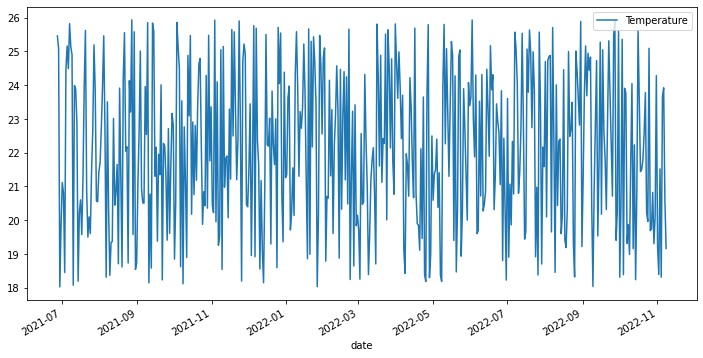

In [21]:
df.plot(figsize=(12,6))